In [1]:
import glob
import os
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
veremi_files = glob.glob('C:\\Users\\thomp\\projects\\school\\fall2022\\secure-autonomous-systems\\CSCI-6907-SecureAutonomousSystems\\mp1-b\\data\\VeReMi_0_3600_2022-10-5_9_16_28\\*.*')

In [3]:
# ground_truth_vids = {'authentic': [], 'attackers': []}
ground_truth_vids = {}
for file in veremi_files:
    file = os.path.basename(file)

    if 'GroundTruth' in file: continue

    split_fn = file.split('-')

    vid = split_fn[1]
    car_type = split_fn[3]

    ground_truth_vids[vid] = 'Genuine' if car_type == 'A0' else 'LocalAttacker'

In [21]:
list(ground_truth_vids.values()).count('Genuine')

127

In [5]:
mbd_records = glob.glob('C:\\Users\\thomp\\projects\\school\\fall2022\\secure-autonomous-systems\\CSCI-6907-SecureAutonomousSystems\\mp1-b\\data\\MDBsmsList_V1_2022-10-5_9_16_28\\*.*')

In [6]:
mdbs = {} # MDBSMs by pseudonym

for file in mbd_records:
    f = open(file)
    file = os.path.basename(file)

    pseudonym = file.split('_')[-1].split('.')[0]
    mdbs[pseudonym] = json.load(f)

In [7]:
mbd_reports = glob.glob('C:\\Users\\thomp\\projects\\school\\fall2022\\secure-autonomous-systems\\CSCI-6907-SecureAutonomousSystems\\mp1-b\\data\\MDReports_V1_2022-10-5_9_16_28\\*.*')

In [8]:
# Local Attack Types ... 0:Genuine, 1:ConstPos, 2:ConstPosOffset, 3:RandomPos, 4:RandomPosOffset, 5:ConstSpeed
# Local Attack Types ... 6:ConstSpeedOffset, 7:RandomSpeed, 8:RandomSpeedOffset, 9:EventualStop, 10:Disruptive,
# Local Attack Types ... 11:DataReplay, 12:StaleMessages, 13:DoS, 14:DoSRandom, 15:DoSDisruptive, 16:GridSybil,
# Local Attack Types ... 17:DataReplaySybil, 18:DoSRandomSybil, 19:DoSDisruptiveSybil

attack_types = {
    'A0': 'Genuine', 
    'A1': 'ConstPos',
    'A2': 'ConstPosOffset',
    'A3': 'RandomPos',
    'A4': 'RandomPosOffset',
    'A5': 'ConstSpeed',
    'A6': 'ConstSpeedOffset',
    'A7': 'RandomSpeed',
    'A8': 'RandomSpeedOffset',
    'A9': 'EventualStop',
    'A10': 'Disruptive',
    'A11': 'DataReplay',
    'A12': 'StaleMessages',
    'A13': 'DoS',
    'A14': 'DoSRandom',
    'A15': 'DoSDisruptive',
    'A16': 'GridSybil',
    'A17': 'DataReplaySybil', 
    'A18': 'DoSRandomSybil',
    'A19': 'DoSDisruptiveSybil',
}

# attack_types = {
#     'A0': 'Genuine', 
#     'A1': 'LocalAttacker',
#     'A2': 'LocalAttacker',
#     'A3': 'LocalAttacker',
#     'A4': 'LocalAttacker',
#     'A5': 'LocalAttacker',
#     'A6': 'LocalAttacker',
#     'A7': 'LocalAttacker',
#     'A8': 'LocalAttacker',
#     'A9': 'LocalAttacker',
#     'A10': 'LocalAttacker',
#     'A11': 'LocalAttacker',
#     'A12': 'LocalAttacker',
#     'A13': 'LocalAttacker',
#     'A14': 'LocalAttacker',
#     'A15': 'LocalAttacker',
#     'A16': 'LocalAttacker',
#     'A17': 'LocalAttacker', 
#     'A18': 'LocalAttacker',
#     'A19': 'LocalAttacker',
# }

100%|██████████| 8863/8863 [00:01<00:00, 6315.16it/s]



	TP: 23.831936631844794
	FP: 0.10519856228631541
	FN: 76.1680633681552
	


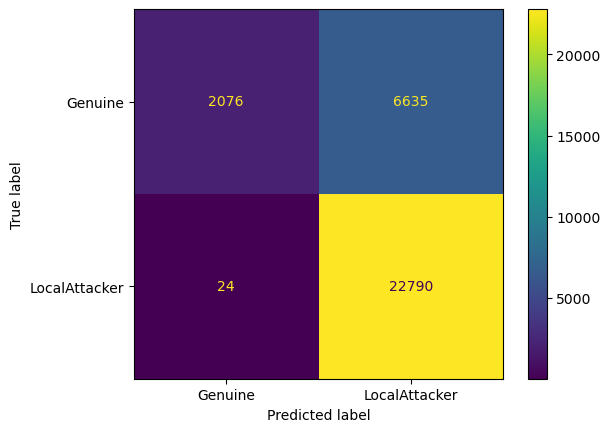

In [24]:
y_true, y_pred = [], []
for report in tqdm(list(mbd_reports)):
    report = json.load(open(report))
    report_sender_real_id = report['Report']['Metadata']['senderRealId']
    for bsm in report['Report']['BSMs']:
        reported_type = report['Report']['Metadata']['mbType']
        y_pred.append(str(reported_type))

        # ground_truth_label = bsm['MbType']
        ground_truth_label = ground_truth_vids[str(bsm['RealId'])]
        y_true.append(ground_truth_label)


cm = confusion_matrix(y_true, y_pred)
total = np.sum(cm)

tp = cm[0, 0] / (cm[0, 0] + cm[0 ,1])
fp = cm[1, 0] / (cm[1, 0] + cm[1, 1])
fn = 1-tp

print("\n\tTP: {}\n\tFP: {}\n\tFN: {}\n\t".format( tp*100, fp*100, fn*100))

ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [23]:
len(y_true)

31525

In [14]:
import sklearn
print(sklearn.metrics.classification_report(y_true, y_pred, zero_division=0))

               precision    recall  f1-score   support

      Genuine       0.99      0.24      0.38      8711
LocalAttacker       0.77      1.00      0.87     22814

     accuracy                           0.79     31525
    macro avg       0.88      0.62      0.63     31525
 weighted avg       0.83      0.79      0.74     31525



In [20]:
attack_types = dict((v,k) for k,v in attack_types.items())
for idx, t in enumerate(list(attack_types.keys())[5:16]):
    y_true, y_pred = [], []

    for report in tqdm(list(mbd_reports)):
        report = json.load(open(report))
        report_sender_real_id = report['Report']['Metadata']['senderRealId']
        for bsm in report['Report']['BSMs']:
            reported_type = report['Report']['Metadata']['attackType']
            if reported_type == t:
                y_pred.append(str(reported_type))
            else:
                y_pred.append('Other')

            # ground_truth_label = bsm['MbType']
            ground_truth_label = bsm['AttackType']
            if ground_truth_label == t:
                y_true.append(ground_truth_label)
            else:
                y_true.append('Other')

    import numpy as np
    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_true, y_pred)
    total = np.sum(cm)

    tp = cm[0, 0] / (cm[0, 0] + cm[0 ,1])
    fp = cm[1, 0] / (cm[1, 0] + cm[1, 1])
    fn = 1-tp

    print("Attack A{} - {}: \n\tTP: {}\n\tFP: {}\n\tFN: {}\n\t".format(idx+5, t*100, tp*100, fp*100, fn*100))
    # cmp = ConfusionMatrixDisplay(cm, display_labels=[t, 'Other Attacks'])
    # fig, ax = plt.subplots(figsize=(10,10))
    # cmp.plot(ax=ax)
    # plt.savefig('./figures/Part2/{}.png'.format(t))
    # plt.cla()
    # plt.clf()
    # ax.clear()
    # ax.remove()
# ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_true, y_pred))

100%|██████████| 8863/8863 [00:01<00:00, 6461.27it/s]


Attack A5 - ConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpeedConstSpe

100%|██████████| 8863/8863 [00:01<00:00, 6390.27it/s]


Attack A6 - ConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOffsetConstSpeedOf

100%|██████████| 8863/8863 [00:01<00:00, 6426.71it/s]


Attack A7 - RandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpeedRandomSpe

100%|██████████| 8863/8863 [00:01<00:00, 6421.80it/s]


Attack A8 - RandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRandomSpeedOffsetRa

100%|██████████| 8863/8863 [00:01<00:00, 6494.46it/s]


Attack A9 - EventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEventualStopEven

100%|██████████| 8863/8863 [00:01<00:00, 6458.71it/s]


Attack A10 - DisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisruptiveDisrupt

100%|██████████| 8863/8863 [00:01<00:00, 6458.71it/s]


Attack A11 - DataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataReplayDataRep

100%|██████████| 8863/8863 [00:01<00:00, 6341.44it/s]


Attack A12 - StaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessagesStaleMessage

100%|██████████| 8863/8863 [00:01<00:00, 6452.52it/s]


Attack A13 - DoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoSDoS: 
	TP: 100.0
	FP: 0.0
	FN: 0.0
	


100%|██████████| 8863/8863 [00:01<00:00, 6367.92it/s]


Attack A14 - DoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandomDoSRandom: 
	TP: 100.0
	FP: 0.5988233646168931
	FN: 0.0
	


100%|██████████| 8863/8863 [00:01<00:00, 6423.65it/s]


Attack A15 - DoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiveDoSDisruptiv

In [24]:
reported_type

'DoSRandomSybil'